# Day 0 : Quick Neuro netowrk
Today we are trying to create quick CNN by using [this](https://www.tensorflow.org/tutorials/quickstart/beginner) tutorial


In [71]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [52]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [53]:
## Here we create Neuro Network

In [54]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [55]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.12370387,  0.57192916,  0.21500622,  0.04654738, -0.6457473 ,
        -0.27183944, -0.6272974 ,  0.21851958, -0.63184416,  0.6199419 ]],
      dtype=float32)

In [56]:
tf.nn.softmax(predictions).numpy()

array([[0.10630278, 0.16642033, 0.11646535, 0.09840926, 0.0492466 ,
        0.07157516, 0.05016362, 0.11687525, 0.04993606, 0.17460555]],
      dtype=float32)

In [57]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [58]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Training our model

In [65]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 1s 502us/step - loss: 0.0298 - accuracy: 0.9897
Epoch 2/2
1875/1875 [==============================] - 1s 503us/step - loss: 0.0299 - accuracy: 0.9892


In [67]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0713 - accuracy: 0.9819


[0.07132385671138763, 0.9818999767303467]

In [68]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

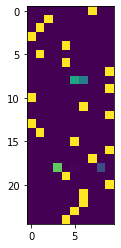

In [126]:
pmodel = probability_model(x_test[:25])
plt.imshow(pmodel,cmap=plt.cm.gray,interpolation='nearest')
plt.imshow(pmodel)


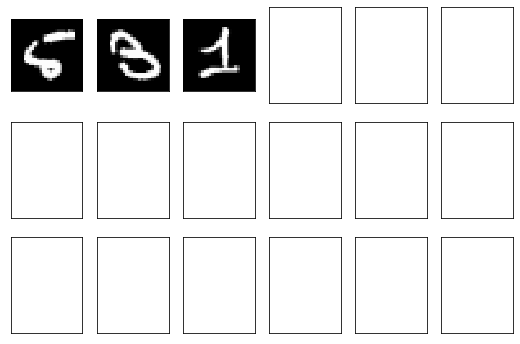

In [125]:
fig, axs =plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

axs[0,0].imshow(x_test[8], cmap=plt.cm.gray, interpolation='nearest')
axs[0,1].imshow(x_test[18], cmap=plt.cm.gray, interpolation='nearest')
axs[0,2].imshow(x_train[24], cmap=plt.cm.gray, interpolation='nearest')